In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans

In [3]:
sns.set_style('dark')

In [4]:
k_data = pd.read_csv('Clustering data')

In [5]:
k_data

,f1,f2,f3,label
0,0.486468,3.346303,-9.977202,unknown
1,-0.675789,1.077062,-9.646650,unknown
2,-6.678185,4.317498,4.732039,unknown
3,-3.829309,5.882044,2.003758,unknown
4,-2.238895,-1.541045,8.066783,unknown
...,...,...,...,...
295,-4.605341,7.134583,5.672519,unknown
296,2.166609,-0.978885,-8.412625,unknown
297,-6.946435,4.353245,7.549017,unknown
298,-2.707774,4.826964,6.414672,unknown


In [6]:
k_data.drop('label', axis=1).describe()

,f1,f2,f3
count,300.000000,300.000000,300.000000
mean,-3.397207,4.374482,0.235504
std,3.700383,3.437432,7.453349
min,-11.991551,-2.387974,-14.852899
25%,-6.406319,1.724335,-8.568218
50%,-3.823196,4.061008,3.572883
75%,-0.281346,7.187759,5.935161
max,4.718471,12.833371,11.587774


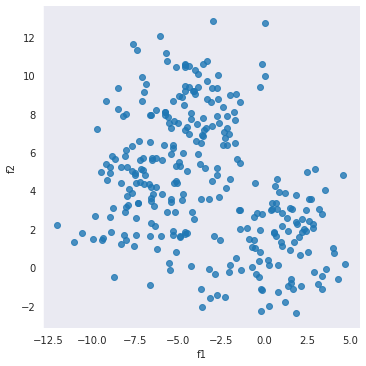

In [7]:
sns.lmplot(data=k_data, x='f1', y='f2', fit_reg=False)

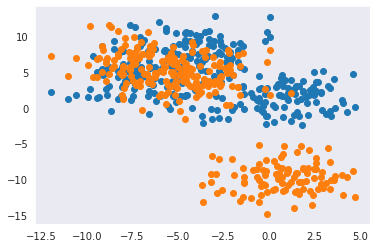

In [8]:
plt.scatter(x=k_data['f1'], y=k_data['f2'],  cmap='rainbow')
plt.scatter(x=k_data['f1'], y=k_data['f3'],  )
plt.show()

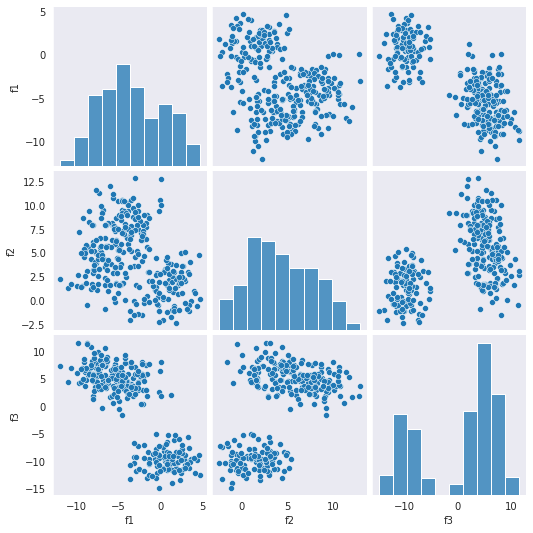

In [9]:
sns.pairplot(k_data, palette='rainbow')

## KMeans Algorithm

In [10]:
kmeans=KMeans()

In [11]:
kmeans.fit(k_data.drop('label', axis=1))

KMeans()

In [12]:
kmeans.labels_

array([1, 6, 3, 4, 3, 1, 7, 6, 5, 7, 1, 5, 2, 3, 0, 4, 3, 7, 2, 7, 0, 0,
       1, 2, 4, 0, 3, 1, 5, 6, 1, 3, 1, 2, 0, 5, 1, 5, 5, 2, 2, 4, 4, 1,
       4, 3, 0, 3, 2, 6, 7, 3, 7, 2, 1, 1, 4, 3, 3, 1, 4, 6, 2, 2, 6, 2,
       2, 1, 5, 5, 2, 7, 1, 3, 0, 1, 6, 4, 4, 7, 2, 7, 2, 2, 2, 0, 1, 4,
       1, 4, 3, 6, 4, 6, 1, 3, 0, 7, 4, 5, 3, 2, 4, 4, 1, 2, 5, 2, 5, 5,
       2, 0, 0, 3, 4, 1, 6, 6, 2, 6, 1, 4, 4, 1, 7, 3, 2, 5, 5, 5, 5, 0,
       0, 3, 1, 0, 4, 2, 6, 4, 5, 7, 7, 2, 0, 2, 1, 3, 1, 4, 1, 5, 2, 0,
       2, 2, 6, 5, 5, 6, 1, 6, 3, 5, 5, 5, 1, 4, 1, 7, 0, 3, 0, 0, 3, 0,
       4, 2, 1, 4, 3, 1, 4, 0, 2, 0, 0, 1, 1, 0, 4, 3, 3, 5, 1, 1, 6, 0,
       5, 6, 2, 4, 7, 4, 2, 4, 6, 4, 2, 4, 0, 0, 6, 3, 1, 5, 0, 0, 5, 1,
       2, 5, 2, 1, 2, 5, 4, 1, 5, 6, 1, 3, 0, 7, 0, 1, 6, 6, 2, 1, 7, 7,
       2, 5, 4, 2, 0, 3, 6, 0, 1, 6, 6, 2, 2, 4, 3, 5, 6, 5, 7, 4, 1, 1,
       6, 7, 7, 7, 4, 2, 2, 0, 0, 4, 4, 5, 0, 4, 0, 1, 7, 2, 1, 2, 3, 4,
       0, 3, 3, 2, 2, 2, 4, 3, 1, 4, 7, 2, 4, 5], d

In [13]:
kmeans.cluster_centers_

array([[ -3.47083931,   9.66635093,   3.23340851],
       [  2.16116325,   1.83745624, -10.12735509],
       [ -7.47959603,   3.52340446,   7.98723457],
       [ -6.00188881,   2.25579941,   4.53955881],
       [ -3.24788942,   6.6245838 ,   5.29553135],
       [ -7.07685463,   7.56520301,   4.14726824],
       [ -1.23736617,   1.19182582, -11.39090015],
       [  0.26163923,   0.69078239,  -7.27021374]])

In [14]:
k_data['labels']=kmeans.labels_

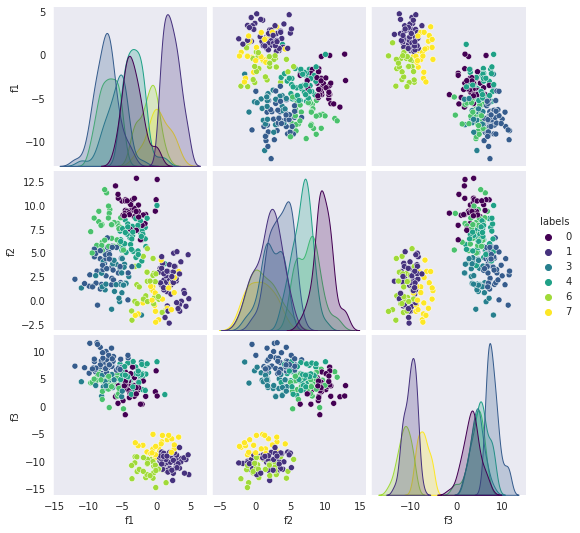

In [15]:
sns.pairplot(k_data, hue='labels', palette='viridis')

In [16]:
inertia=[]
for k in range(1,7):
    kmean=KMeans(n_clusters=k)
    kmean.fit(k_data.drop(['label','labels'], axis=1))
    inertia.append(kmean.inertia_)

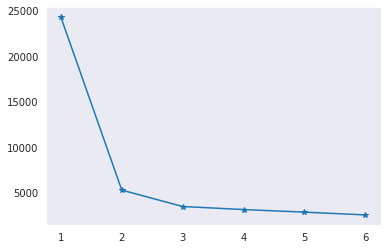

In [17]:
plt.plot(range(1,7),inertia,marker='*')
plt.show()

In [18]:
# 3 seems to be best for number of clusters

In [19]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(k_data[['f1','f2','f3']])

KMeans(n_clusters=3)

In [20]:
kmeans.labels_

array([1, 1, 2, 0, 2, 1, 1, 1, 0, 1, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 0,
       1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 0, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 0,
       1, 0, 2, 1, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2,
       2, 0, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 2, 1, 0, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0,
       2, 2, 1, 0, 2, 1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 0, 2, 0,
       0, 2, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0,
       2, 1, 2, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1,
       2, 0, 2, 1, 2, 0, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 1, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 1, 2, 2, 0], d

In [21]:
k_data['labels']=kmeans.labels_

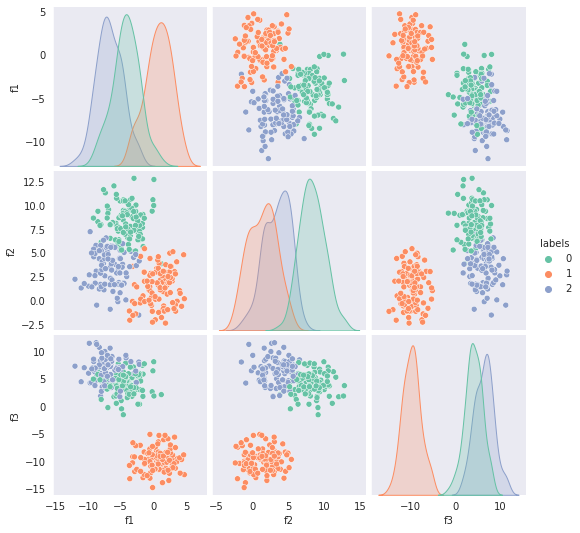

In [22]:
sns.pairplot(k_data, hue='labels', palette='Set2')

In [23]:
k_data

,f1,f2,f3,label,labels
0,0.486468,3.346303,-9.977202,unknown,1
1,-0.675789,1.077062,-9.646650,unknown,1
2,-6.678185,4.317498,4.732039,unknown,2
3,-3.829309,5.882044,2.003758,unknown,0
4,-2.238895,-1.541045,8.066783,unknown,2
...,...,...,...,...,...
295,-4.605341,7.134583,5.672519,unknown,0
296,2.166609,-0.978885,-8.412625,unknown,1
297,-6.946435,4.353245,7.549017,unknown,2
298,-2.707774,4.826964,6.414672,unknown,2
